# MULTIPLE LINEAR REGRESSION - MLR 

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## BASELINE MODEL: 

- “Country”, “Jobtype”, “Education”, “Job title”, “Company size”, “Age”, “Experience” and “Annual Salary” 


In [31]:
df = pd.read_csv('clean_and_encoded_df.csv')

baseline_cols = ["Country", "Job_type", "Education", "Company_size", "Age", "Work_experience", "Annual_salary"]

# Add Job_title columns to the baseline_cols list
Job_title = ['Developer, game or graphics', 'Blockchain', 'Developer, QA or test', 'Developer, back-end', 'Student', 
             'Project manager', 'Data or business analyst', 'Cloud infrastructure engineer', 'Engineer, data', 
             'Educator', 'Developer, desktop or enterprise applications', 'Developer, front-end', 'Designer', 
             'Security professional', 'Developer, embedded applications or devices', 'Product manager', 'Developer, mobile', 
             'Developer, full-stack', 'Scientist', 'Database administrator', 'Academic researcher', 'Senior Executive (C-Suite, VP, etc.)', 
             'Marketing or sales professional', 'System administrator', 'Data scientist or machine learning specialist', 
             'Engineer, site reliability', 'DevOps specialist', 'Engineering manager']

baseline_cols.extend(Job_title)

# Iterate through the columns and keep only those containing the specified keywords
columns_to_keep = [col for col in df.columns if any(keyword in col for keyword in baseline_cols)]

# Filter the DataFrame, keeping only the selected columns
baseline_df = df[columns_to_keep]


baseline_df.head()

,Education,Company_size,Age,Job_type_Full-time employed,Job_type_Independent contractor / Freelancer / Self-employed,Job_type_Other,Job_type_Part-time employed,Country_Andorra,Country_Angola,Country_Argentina,...,Marketing or sales professional,Product manager,Project manager,Scientist,Security professional,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator,Work_experience,Annual_salary
0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,4.8,40205.0
1,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,6.4,52769.0
2,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,6.0,54025.0
3,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,7.8,72243.0
4,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,11.4,62820.0


In [32]:
base_X = baseline_df.drop('Annual_salary', axis=1)
y = baseline_df['Annual_salary']
print(base_X.shape)
print(y.shape)

(2805, 138)
(2805,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(base_X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Code with Adj R2

k = 5
num_val_samples = len(X_train_scaled) // k
all_scores_r2_mlr = []
all_scores_rmse_mlr = []
all_scores_mae_mlr = []
all_scores_adj_r2_mlr = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [X_train_scaled[:i * num_val_samples],
         X_train_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    model = LinearRegression()
    model.fit(partial_train_data, partial_train_targets)

    val_preds = model.predict(val_data)
    r2_val = r2_score(val_targets, val_preds)
    rmse_val = np.sqrt(mean_squared_error(val_targets, val_preds))
    mae_val = mean_absolute_error(val_targets, val_preds)

    n = len(val_data)
    p = partial_train_data.shape[1]
    adjusted_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)
    all_scores_adj_r2_mlr.append(adjusted_r2_val)

    all_scores_r2_mlr.append(r2_val)
    all_scores_rmse_mlr.append(rmse_val)
    all_scores_mae_mlr.append(mae_val)

mean_r2_mlr = np.mean(all_scores_r2_mlr)
std_r2_mlr = np.std(all_scores_r2_mlr)
mean_rmse_mlr = np.mean(all_scores_rmse_mlr)
std_rmse_mlr = np.std(all_scores_rmse_mlr)
mean_mae_mlr = np.mean(all_scores_mae_mlr)
std_mae_mlr = np.std(all_scores_mae_mlr)

mean_adj_r2_mlr = np.mean(all_scores_adj_r2_mlr)
std_adj_r2_mlr = np.std(all_scores_adj_r2_mlr)

print(f"Average R2 score (MLR): {mean_r2_mlr:.3f} (+/- {std_r2_mlr:.3f})")
print(f"Average adjusted R2 score (MLR): {mean_adj_r2_mlr:.3f} (+/- {std_adj_r2_mlr:.3f})")
print(f"Average RMSE score (MLR): {mean_rmse_mlr:.3f} (+/- {std_rmse_mlr:.3f})")
print(f"Average MAE score (MLR): {mean_mae_mlr:.3f} (+/- {std_mae_mlr:.3f})")


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
Average R2 score (MLR): -13449265799566006140249571328.000 (+/- 8162682659846925347907960832.000)
Average adjusted R2 score (MLR): -19455734020731410271308873728.000 (+/- 11808152585603807084718063616.000)
Average RMSE score (MLR): 5627748511452433408.000 (+/- 1790368162893868544.000)
Average MAE score (MLR): 506460911501264576.000 (+/- 130522419233085856.000)


In [35]:
mlr_results_dic = {}

mlr_results_dic['MLR'] = {'R2': mean_r2_mlr, 'Adj R2': mean_adj_r2_mlr, 'RMSE': mean_rmse_mlr, 'MAE': mean_mae_mlr }
mlr_results = pd.DataFrame.from_dict(mlr_results_dic, orient='index')
mlr_results

,R2,Adj R2,RMSE,MAE
MLR,-1.344927e+28,-1.945573e+28,5.627749e+18,5.064609e+17


In [36]:
mlr_results.to_csv('mlr_results.csv', index=True)

In [37]:
# Combine the training and validation sets
X_train_val = np.concatenate((X_train_scaled, val_data), axis=0)
y_train_val = np.concatenate((y_train, val_targets), axis=0)

# Train the model on the combined training and validation sets
model = LinearRegression()
model.fit(X_train_val, y_train_val)

# Predict the test set
y_pred = model.predict(X_test_scaled)

# Calculate the R2 score, Adjusted R2, RMSE, and MAE
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
n_test = len(X_test_scaled)
p_test = X_train_val.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

print(f"R2 in validation set (MLR): {r2_test:.3f}")
print(f"Adjusted R2 in validation set (MLR): {adjusted_r2_test:.3f}")
print(f"RMSE in validation set (MLR): {rmse_test:.3f}")
print(f"MAE  in validation set (MLR): {mae_test:.3f}")


R2 in validation set (MLR): -6495178786499154482823168.000
Adjusted R2 in validation set (MLR): -8619194598197929971810304.000
RMSE in validation set (MLR): 129230559979504848.000
MAE  in validation set (MLR): 14076571778101968.000


In [38]:
test_results_dic = {}
test_results_dic['MLR'] = {'R2': r2_test,  'Adj R2': adjusted_r2_test, 'RMSE': rmse_test, 'MAE': mae_test}
test_results = pd.DataFrame.from_dict(test_results_dic, orient='index')
test_results

,R2,Adj R2,RMSE,MAE
MLR,-6.495179e+24,-8.619195e+24,1.292306e+17,1.407657e+16


In [39]:
test_results.to_csv('test_mlr_results.csv', index=True)

MemoryError: Unable to allocate 582. TiB for an array with shape (79998391433420,) and data type float64

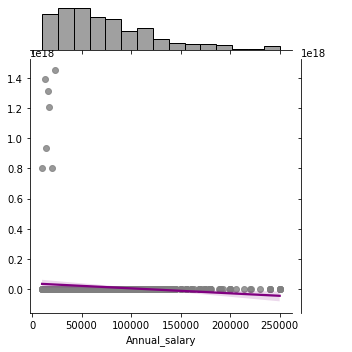

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint dataframe by concatenating the two variables
g = sns.JointGrid(x=y_test, y=y_pred, height=5)

# Create scatterplot and regression plots
g.plot_joint(sns.regplot, scatter_kws={'color': 'grey'}, line_kws={'color': 'purple'})

# Add histograms
g.plot_marginals(sns.histplot, kde=False, color='grey')

# Adjust the arrangement of the plots
g.fig.subplots_adjust(top=0.9)

# Add title 
g.fig.suptitle("MLR performance - Test set")

# Add labels to the plot
g.ax_joint.set_xlabel("Truth")
g.ax_joint.set_ylabel("Predictions")

plt.show()